<a href="https://colab.research.google.com/github/Thibsuda/Bank_Term_Deposit_Predictions/blob/main/Bank_Term_Deposit_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Term Deposit Predictions



## Features


The dataset contains various features that provide insights into customer attributes and campaign outcomes. These features include:

- Age: The age of the customer.
- Job: The occupation of the customer.
- Marital Status: The marital status of the customer.
- Education: The education level of the customer.
- Default: Whether or not the customer has credit in default.
- Balance: The balance of the customer's account.
- Housing Loan: Whether or not the customer has a housing loan.
Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).
- Day: The day of the month when the last contact with the customers was made.
- Duration: The duration (in seconds) of the last contact with customers during a campaign.
- Campaign Contacts Count: Number of contacts performed during this campaign for each customer
- pdays : number days passed since previously contacted form previous camapign
- poutcome : outcome from previous marketing campaign





In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")



#model from scikit-learn look at map and choses
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


#model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [4]:
# connect to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_df = pd.read_csv("/content/drive/MyDrive/Bank Term Deposit Predictions/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Bank Term Deposit Predictions/test.csv")

In [6]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [8]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
# check missing value
test_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
# Get statistical analysis

train_df['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [12]:
train_df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [13]:
# In the data show people subscribe deposit term  before 'yes' = 5289  'no' 39922

train_df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Bank Deosit term Target

<Axes: >

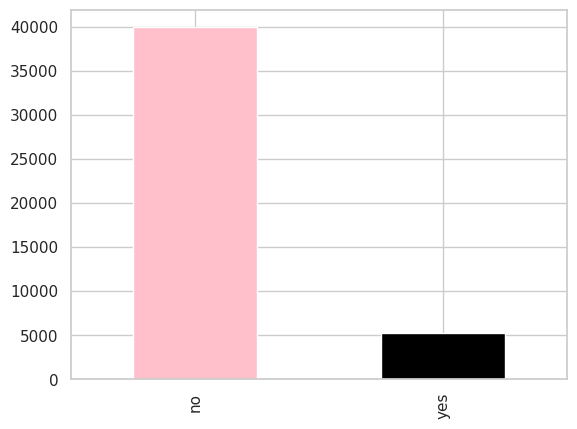

In [14]:
# Target result
sns.diverging_palette(145, 300, s=60, as_cmap=True)
train_df["y"].value_counts().plot(kind="bar",color=['pink','black'])

<ipython-input-15-44ac7cfff2c6>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(train_df['age'],bins=50, kde=True, palette='virdis')


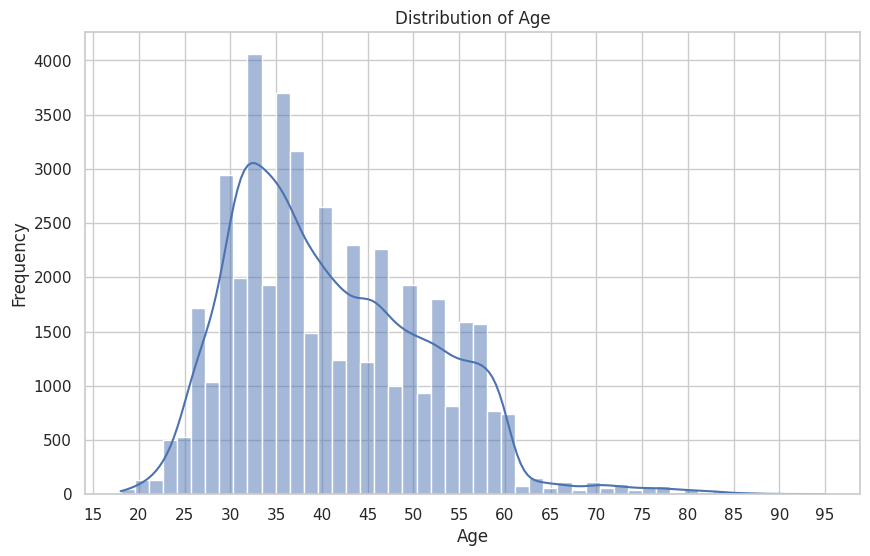

In [15]:
# Visual analyst The target vs age
plt.figure(figsize=(10,6))
ax = sns.histplot(train_df['age'],bins=50, kde=True, palette='virdis')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(15,100, 5)])


plt.show();

In [16]:
test_df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [17]:
# change unknow to others

train_df['job'].replace('unknown', 'others', inplace=True)
test_df['job'].replace('unknown', 'others', inplace=True)

# Most majority of job in data

<ipython-input-18-c902bbdfa421>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')


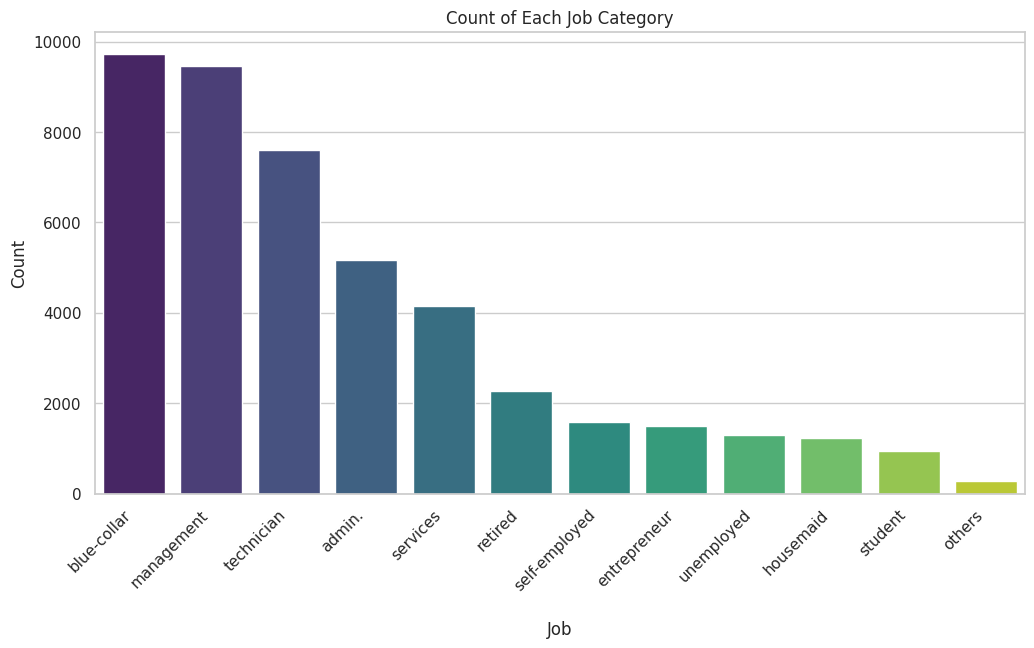

In [18]:
# Define counts
job_counts = train_df['job'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Job Category')
plt.xlabel('\nJob')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [19]:
train_df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

#Education relate to Deposit term

<ipython-input-20-20b40c0ae4f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')


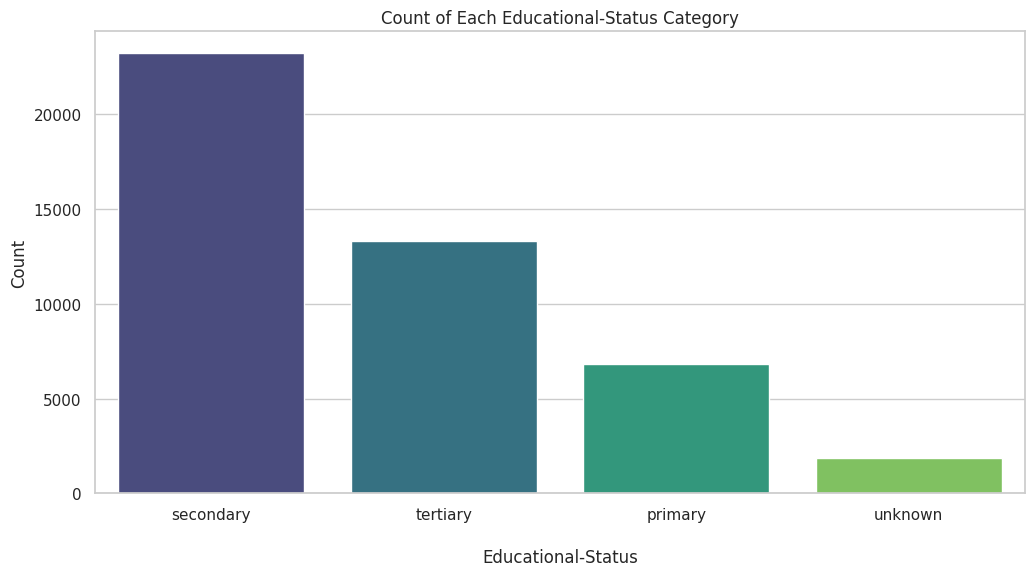

In [20]:
# Define Counts
education_counts = train_df['education'].value_counts()

# Define figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')

# Add labels and title
plt.title('Count of Each Educational-Status Category')
plt.xlabel('\nEducational-Status')
plt.ylabel('Count')

# Show the plot
plt.show()

In [21]:
# change education 'unknow' to other
train_df['education'].replace('unknown','others', inplace=True)
test_df['education'].replace('unknown','others', inplace=True)

In [22]:
train_df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

# Marital Status Feature relate with Deposit term

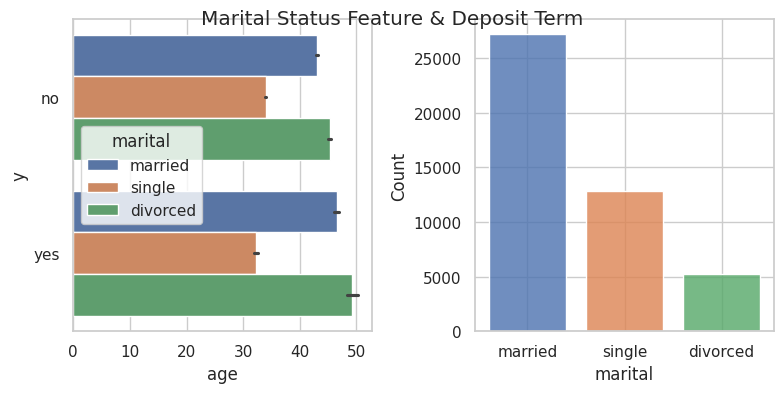

In [23]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[6, 6]))
sns.barplot(data=train_df, x="age", y="y", hue="marital", ax=axs[0])
sns.histplot(data=train_df, x="marital", hue="marital", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

plt.suptitle("Marital Status Feature & Deposit Term");

#Balance account

In [24]:
train_df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [25]:
train_df['education'].replace('unknown', 'others', inplace=True)


In [26]:
y_array = train_df['y'].values
y_array

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

## Crosstab Target vs Loan

In [27]:
pd.crosstab(train_df.y,train_df.loan)

loan,no,yes
y,,
no,33162,6760
yes,4805,484


## Age Feature

In [28]:
#Age Statistical
train_df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [29]:
train_df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

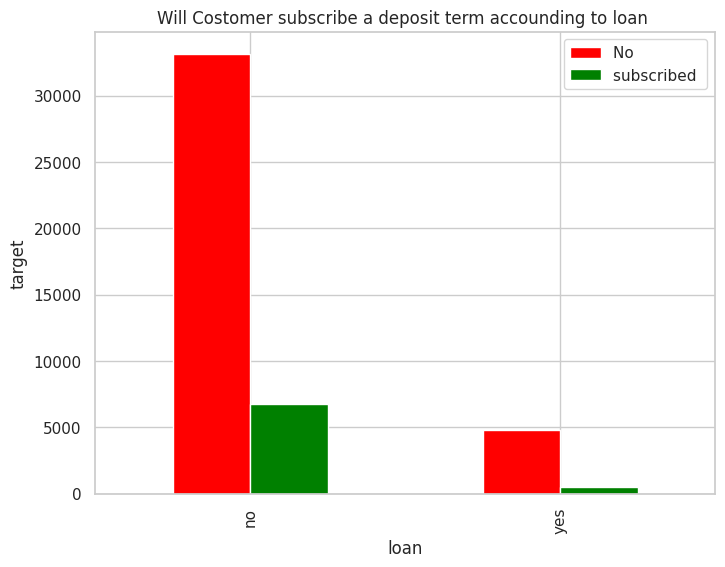

In [30]:
#Crosstab plot

pd.crosstab(train_df.y,train_df.loan).plot(kind="bar",
                                           figsize=(8,6),
                                           color=["red","green"])
plt.title("Will Costomer subscribe a deposit term accounding to loan ")
plt.xlabel("loan")
plt.ylabel("target")
plt.legend(["No  ","subscribed "]);





In [31]:
# Explicitly set numeric_only to True or False
train_df.corr(numeric_only=True)  # or df.corr(numeric_only=False)


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


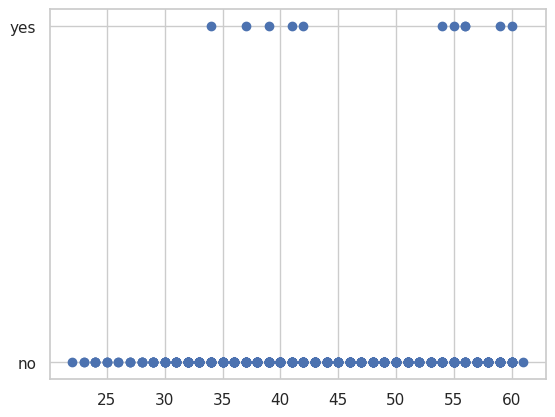

In [32]:
# See in Scatter plot
fig, ax = plt.subplots()
ax.scatter(train_df["age"][:500],train_df["y"][:500])

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Turn ctegorical to numerical

In [36]:
# Convert Train data to numerical

from sklearn.preprocessing import LabelEncoder
train_df_encoded = train_df.copy()


# laebl encoding for  ordinal categories data
label_encoder = LabelEncoder()
ordinal_columns = ['job','marital', 'education', 'default','housing','loan','contact','month','poutcome','y']

#train_df_encoded = label_encoder.fit_transform(train_df['marital', 'education', 'default','housing','loan','contact','month','poutcome','y'])

for column in ordinal_columns:
    train_df_encoded[column] = label_encoder.fit_transform(train_df[column])

# No longer use! One- Hot Encoder for nominal category columns
#train_df_encoded = pd.get_dummies(train_df_encoded, columns=['job'])





In [37]:
#covert test data to numerical

test_df_encoded = test_df.copy()
# laebl encoding for  ordinal categories data
label_encoder = LabelEncoder()
ordinal_columns = ['job','marital', 'education', 'default','housing','loan','contact','month','poutcome','y']

#train_df_encoded = label_encoder.fit_transform(train_df['marital', 'education', 'default','housing','loan','contact','month','poutcome','y'])

for column in ordinal_columns:
    test_df_encoded[column] = label_encoder.fit_transform(test_df[column])

# No longer use One- Hot Encoder for nominal category columns
#test_df_encoded = pd.get_dummies(test_df_encoded, columns=['job'])

In [38]:
test_df_encoded.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,1,1,2,0,668,1,0,2,15,8,1263,2,-1,0,3,1
4512,40,1,1,2,0,1100,1,0,2,29,8,660,2,-1,0,3,0
4513,49,1,1,2,0,322,0,0,0,14,1,356,2,-1,0,3,0
4514,38,1,1,2,0,1205,1,0,0,20,0,45,4,153,1,0,0
4515,32,8,2,2,0,473,1,0,0,7,5,624,5,-1,0,3,0
4516,33,8,1,2,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,7,1,3,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,10,1,2,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,2,0,1137,0,0,0,6,3,129,4,211,3,1,0
4520,44,2,2,3,0,1136,1,1,0,3,0,345,2,249,7,1,0


In [39]:
test_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


#Correlation martix

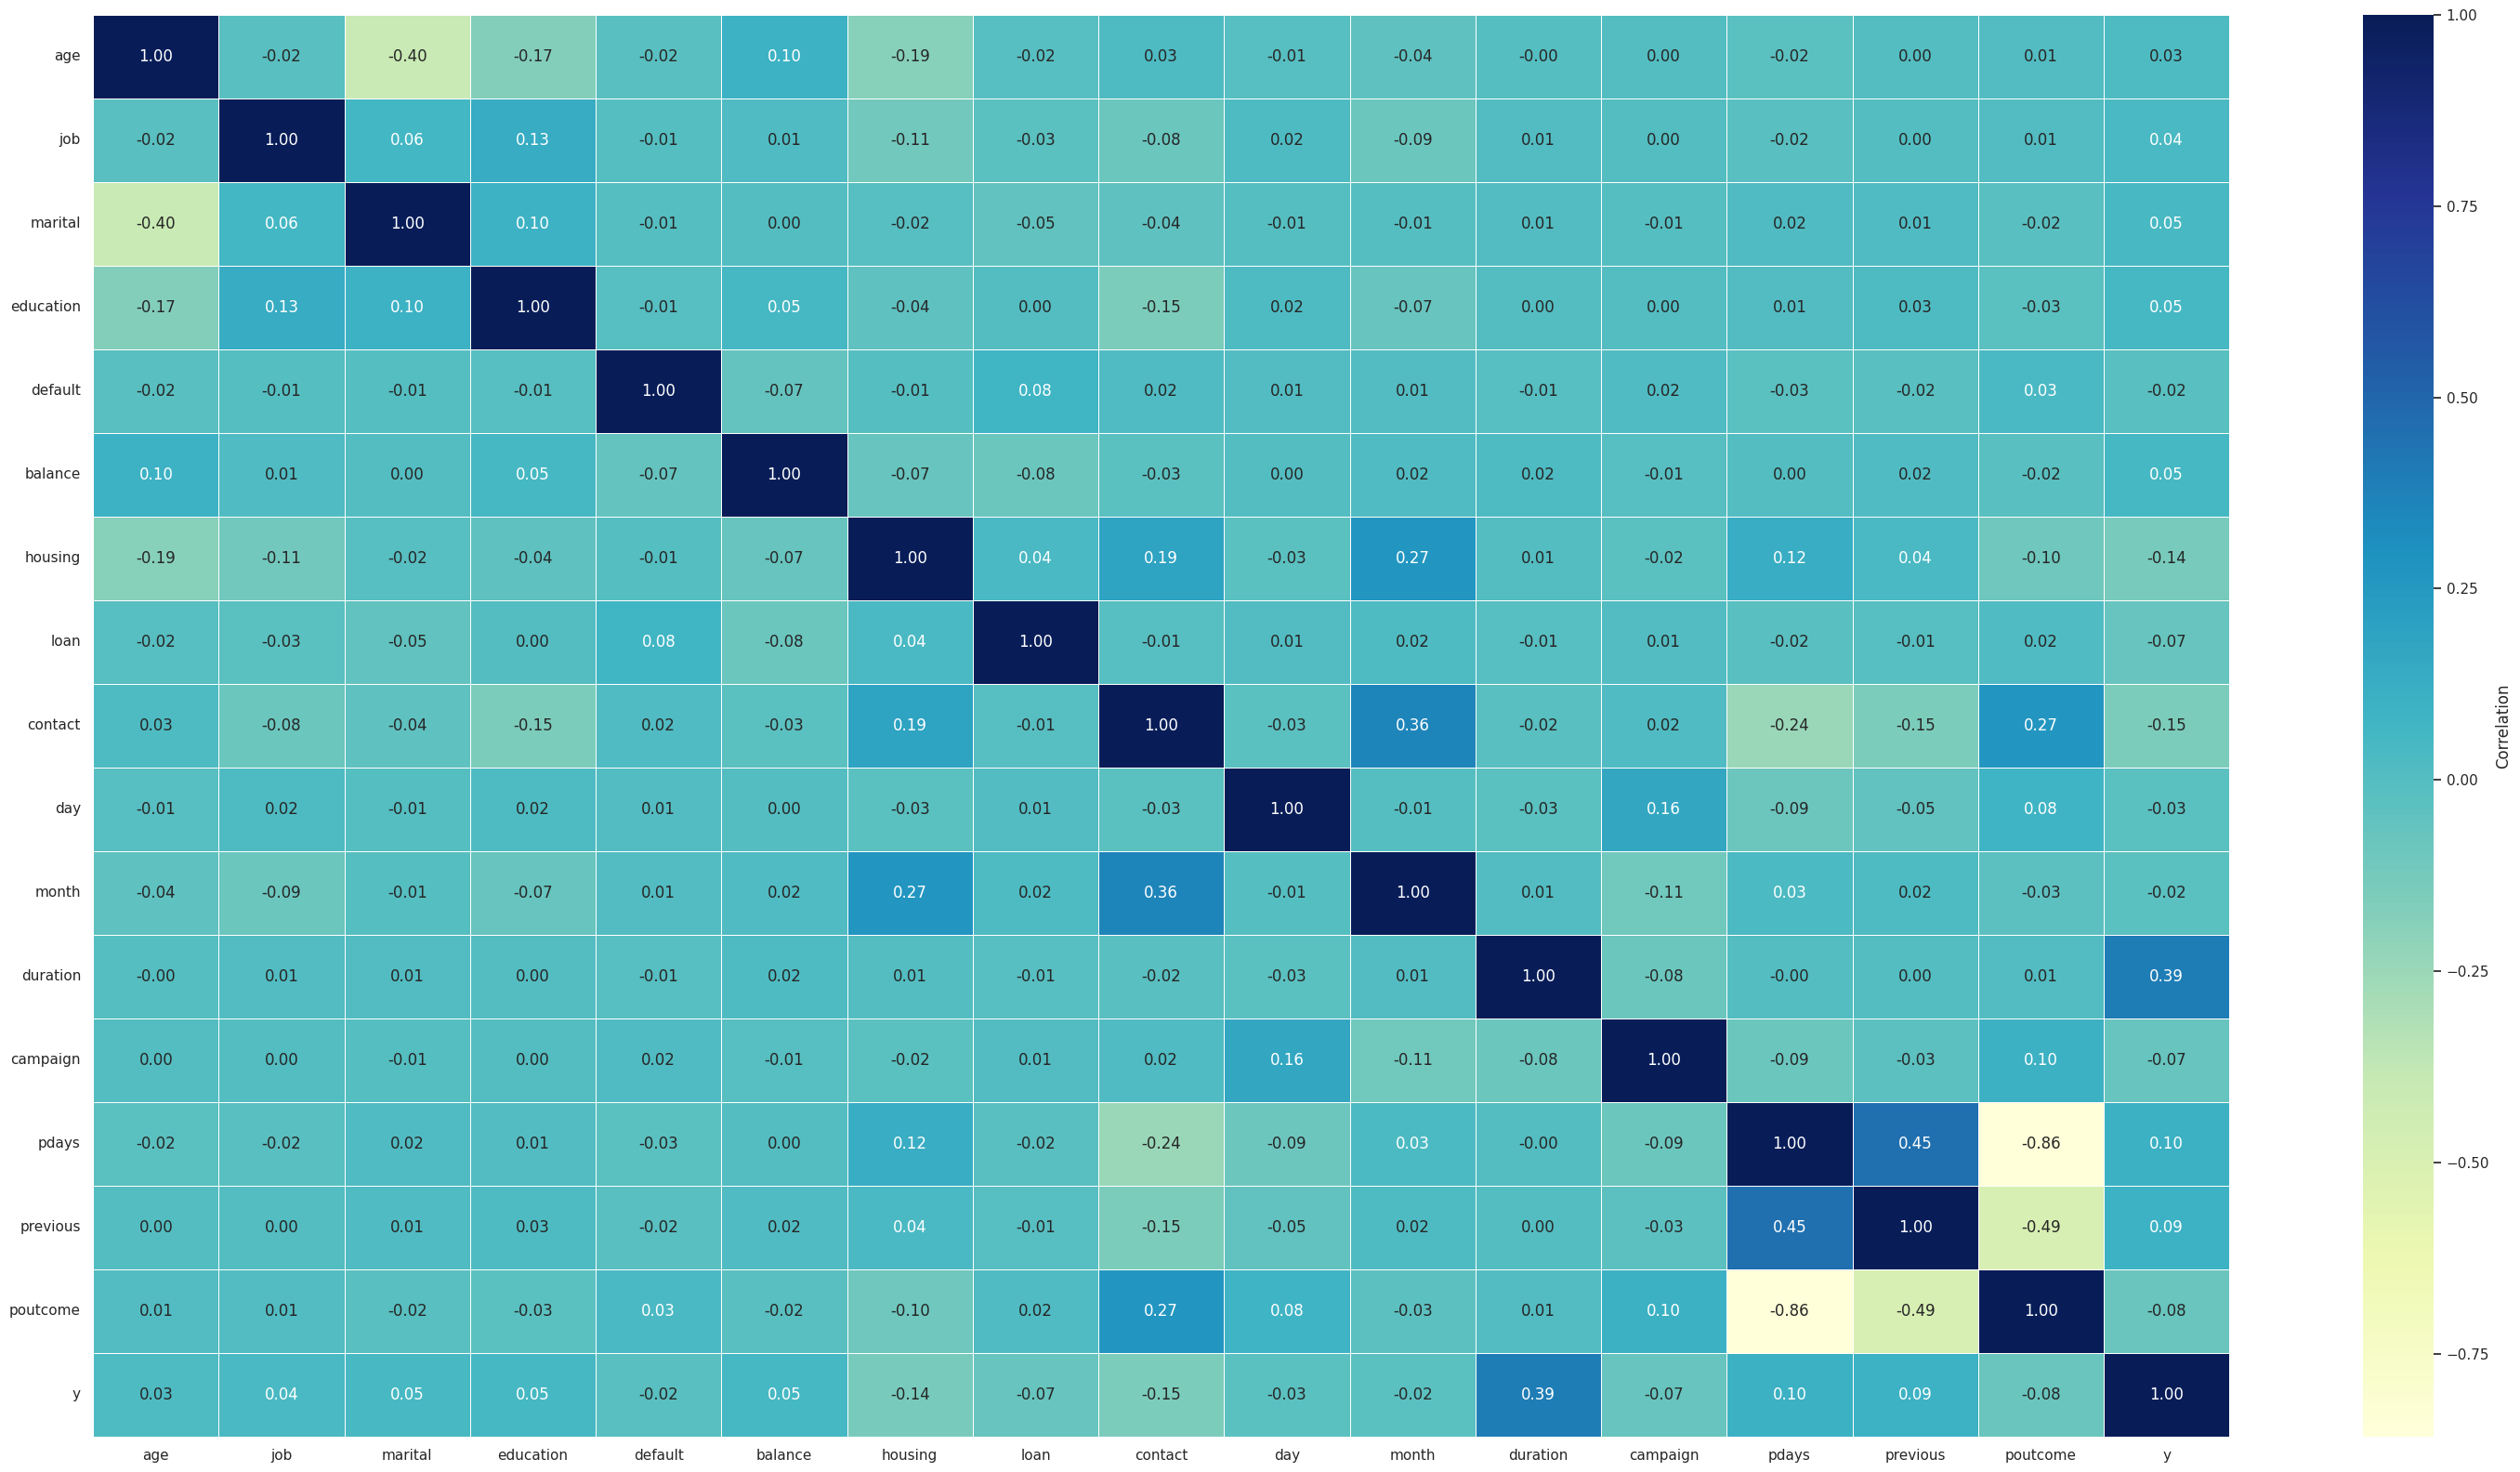

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
fig, ax = plt.subplots(figsize=(30, 16))

# Compute the correlation matrix
corr_matrix = train_df_encoded.corr()

# Customize the heatmap
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu",
                 cbar_kws={'label': 'Correlation'})

# Rotate y-axis labels for better visibility
plt.yticks(rotation=0)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


In [41]:
test_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


# Fit data into Model

In [42]:
#train set
x_train = train_df_encoded.drop('y',axis=1)
y_train = train_df_encoded['y']

#test set
x_test = test_df_encoded.drop('y',axis=1)
y_test = test_df_encoded['y']

In [43]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,3,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,10,2,2,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,2,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,0,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,5,2,0,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,1,3,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,6,0,1,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,6,1,2,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,2,0,668,0,0,1,17,9,508,4,-1,0,3


In [44]:
#After 1st experiment I dicided to seperate train set to val set

In [45]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size=0.2,random_state=42)

In [46]:
# 1. Put models in dictionary

models = {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier(),
          "LinerSCV":LinearSVC()}

#2. Create a funtion to fit and score models. Add some note for us and team to understand it

def fit_and_score(models,x_train,x_val,x_test,y_train,y_val,y_test): #afrer def we can create any name that simple,but it will take our dictionary of model and x,y train x,ytest

    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learning machine learning models.
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels

    """
#Set random seed
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        # fit model with training set
        model.fit(x_train,y_train)
        #Evaluate on the validation tes
        val_accuracy = model.score(x_val,y_val)
        #Evaluate test set
        model_scores[name] = model.score(x_test,y_test)

    return model_scores

In [47]:
# Evaluate each Modle by function that we created:

#Call our funtion from =3. and fit and score from # 2.
model_scores = fit_and_score(models= models,
                            x_train= x_train,
                            x_test= x_test,
                            x_val = x_val,
                            y_train= y_train,
                            y_test= y_test,
                            y_val= y_val)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 0.8860871488608715,
 'KNN': 0.9059942490599425,
 'Random Forest': 0.980092899800929,
 'LinerSCV': 0.8847600088476001}

# The performant of  each baseline model class in our test_data set and without turnin

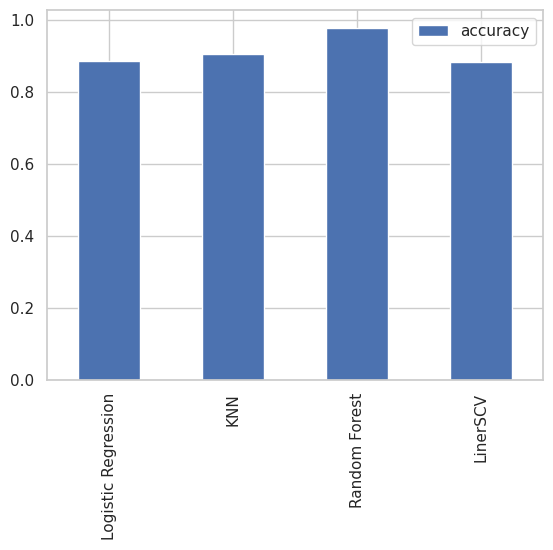

In [48]:
# Score compare
model_compare = pd.DataFrame(model_scores,index=["accuracy"])# accuracy because our model was Classification (default score is accuracy )
model_compare.T.plot.bar();

In [49]:
model_scores

{'Logistic Regression': 0.8860871488608715,
 'KNN': 0.9059942490599425,
 'Random Forest': 0.980092899800929,
 'LinerSCV': 0.8847600088476001}

# Tuning KNN

In [50]:

# Tune KNN,

# so we want to compare differrent version of same model with differrent setting, (try with 20 differrent hyperrarameter)

train_scores = []
test_scores = []

#2. Create a list of different values for n_neighbors(parameter that we can adjust to get high score of evaluate)

neighbors = range(1,20)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))


In [51]:
test_scores

[0.9738995797389958,
 0.9132935191329352,
 0.915947799159478,
 0.9077637690776377,
 0.9059942490599425,
 0.902676399026764,
 0.9006856890068569,
 0.9006856890068569,
 0.9000221190002212,
 0.9011280690112807,
 0.8984737889847378,
 0.8986949789869498,
 0.8971466489714665,
 0.8953771289537713,
 0.8955983189559832,
 0.8927228489272285,
 0.8927228489272285,
 0.893828798938288,
 0.8929440389294404]

In [52]:
train_scores

[1.0,
 0.922472904224729,
 0.9240212342402123,
 0.9107774828577748,
 0.911689891616899,
 0.904943596549436,
 0.9053859765538598,
 0.902731696527317,
 0.9033676177836761,
 0.9004921477549215,
 0.9001603627516036,
 0.8980867064808671,
 0.8993032514930325,
 0.8976719752267197,
 0.8976166777261668,
 0.8960683477106834,
 0.896040698960407,
 0.8951559389515594,
 0.8949347489493474]

Maximum KNN Score on TEST DATA:97.39%


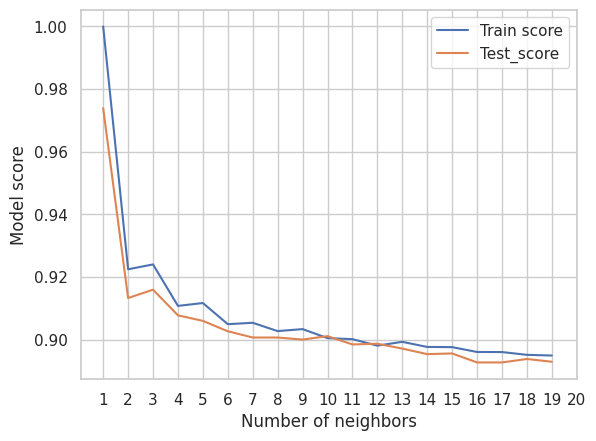

In [53]:
# Visualize train_score, test_score Ps.
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test_score")
plt.xticks(range(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN Score on TEST DATA:{max(test_scores)*100:.2f}%")

After tuning KNN improve from 0.91 to 1.0

# Matrix Precision , Recall, F1 Score , ROC-AUC  for KNN model for "Unbalance Data"

In [54]:
y_preds = knn.predict(x_test)

In [55]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4000
           1       0.58      0.27      0.37       521

    accuracy                           0.89      4521
   macro avg       0.74      0.62      0.65      4521
weighted avg       0.87      0.89      0.88      4521



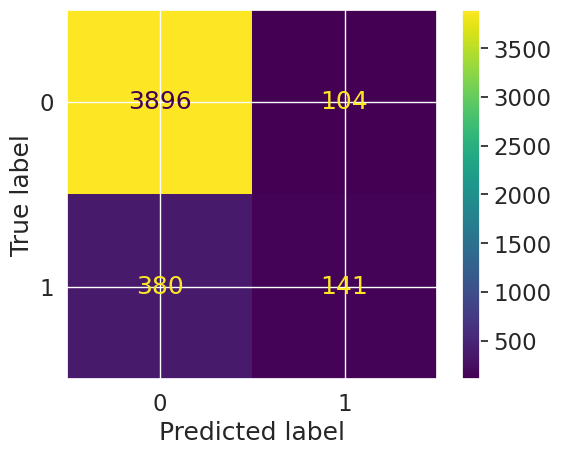

In [56]:
sns.set(font_scale=1.5)
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

#Ideal modelwith F1 score

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler



# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_val_scaled = scaler.transform(x_val)
X_test_scaled = scaler.transform(x_test)

# 1. Put models in dictionary
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "LinearSVC": LinearSVC(class_weight='balanced', max_iter=1000, random_state=42)
}

# 2. Create a function to fit and score models
def fit_and_score(models, x_train, x_val, x_test, y_train, y_val, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        # fit model with training set
        model.fit(X_train_scaled, y_train)

        # Evaluate on the validation set
        y_val_pred = model.predict(X_val_scaled)
        f1_val = f1_score(y_val, y_val_pred)

        # Evaluate on the test set
        y_test_pred = model.predict(X_test_scaled)
        f1_test = f1_score(y_test, y_test_pred)

        model_scores[name] = {
            "Validation F1 Score": f1_val,
            "Test F1 Score": f1_test
        }

    return model_scores

# 3. Evaluate models
model_scores = fit_and_score(models, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test)
model_scores


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': {'Validation F1 Score': 0.4967283072546231,
  'Test F1 Score': 0.47285464098073554},
 'KNN': {'Validation F1 Score': 0.42570754716981135,
  'Test F1 Score': 0.5346062052505967},
 'Random Forest': {'Validation F1 Score': 0.4444444444444444,
  'Test F1 Score': 0.9063444108761329},
 'LinearSVC': {'Validation F1 Score': 0.4935585456627541,
  'Test F1 Score': 0.4760779681039574}}

#Ideal model for F1 Score and Area Under the Precision-Recall Curve (AUC-PRC),

In [58]:
from sklearn.metrics import average_precision_score

# 2. Create a function to fit and score models
def fit_and_score(models, x_train, x_val, x_test, y_train, y_val, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        # fit model with training set
        model.fit(x_train, y_train)

        # Evaluate on the validation set
        y_val_pred = model.predict(x_val)
        f1_val = f1_score(y_val, y_val_pred)

        if hasattr(model, 'decision_function'):
            # For classifiers with decision_function (e.g., LinearSVC)
            prc_auc_val = average_precision_score(y_val, model.decision_function(x_val))  # AUC-PRC
        elif hasattr(model, 'predict_proba'):
            # For classifiers with predict_proba (e.g., RandomForestClassifier)
            proba_val = model.predict_proba(x_val)[:, 1]
            prc_auc_val = average_precision_score(y_val, proba_val)  # AUC-PRC
        else:
            prc_auc_val = None

        # Evaluate on the test set
        y_test_pred = model.predict(x_test)
        f1_test = f1_score(y_test, y_test_pred)

        if hasattr(model, 'decision_function'):
            prc_auc_test = average_precision_score(y_test, model.decision_function(x_test))  # AUC-PRC
        elif hasattr(model, 'predict_proba'):
            proba_test = model.predict_proba(x_test)[:, 1]
            prc_auc_test = average_precision_score(y_test, proba_test)  # AUC-PRC
        else:
            prc_auc_test = None

        model_scores[name] = {
            "Validation F1 Score": f1_val,
            "Validation AUC-PRC": prc_auc_val,
            "Test F1 Score": f1_test,
            "Test AUC-PRC": prc_auc_test
        }

    return model_scores

# 3. Evaluate models
model_scores = fit_and_score(models, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test)
model_scores



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': {'Validation F1 Score': 0.4967283072546231,
  'Validation AUC-PRC': 0.46508701257244534,
  'Test F1 Score': 0.47285464098073554,
  'Test AUC-PRC': 0.4418259954638818},
 'KNN': {'Validation F1 Score': 0.42570754716981135,
  'Validation AUC-PRC': 0.44061176680446584,
  'Test F1 Score': 0.5346062052505967,
  'Test AUC-PRC': 0.5812923051730751},
 'Random Forest': {'Validation F1 Score': 0.4444444444444444,
  'Validation AUC-PRC': 0.6095151554144934,
  'Test F1 Score': 0.9063444108761329,
  'Test AUC-PRC': 0.9667932529716917},
 'LinearSVC': {'Validation F1 Score': 0.4935585456627541,
  'Validation AUC-PRC': 0.46446220369462965,
  'Test F1 Score': 0.4760779681039574,
  'Test AUC-PRC': 0.43933866654618786}}

# Tuning RanfomForestClassifier model


### RandomSearchCV to find best parameter

In [59]:
# Grid
rf_grid = {"n_estimators":np.arange(10,200,5),
          "max_depth":[None,1],
          "min_samples_split":np.arange(1,20,1),
          "min_samples_leaf":np.arange(1,50,2)}

In [60]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          n_iter = 20,
                          cv=5,
                          verbose=True)
rs_rf.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [61]:
rs_rf.best_params_

{'n_estimators': 130,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': None}

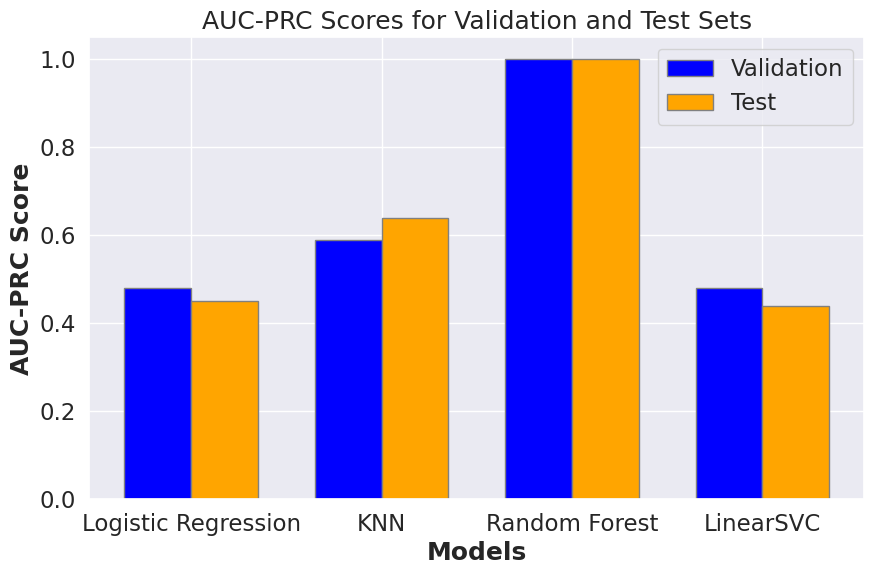

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Your model scores
model_scores = {
    'Logistic Regression': {'Validation': 0.48, 'Test': 0.45},
    'KNN': {'Validation': 0.59, 'Test': 0.64},
    'Random Forest': {'Validation': 1.0, 'Test': 1.0},
    'LinearSVC': {'Validation': 0.48, 'Test': 0.44}
}

# Extract AUC-PRC scores from the model results
model_names = list(model_scores.keys())
val_auc_prc_scores = [result['Validation'] for result in model_scores.values()]
test_auc_prc_scores = [result['Test'] for result in model_scores.values()]

# Bar width
bar_width = 0.35

# Set positions of bar on X axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

# Increase figure size
plt.figure(figsize=(10, 6))


# Plot bars
plt.bar(r1, val_auc_prc_scores,  color='blue', width=bar_width, edgecolor='grey', label='Validation')
plt.bar(r2, test_auc_prc_scores, color='orange', width=bar_width, edgecolor='grey', label='Test')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names)
plt.ylabel('AUC-PRC Score', fontweight='bold')

# Add legend & title
plt.legend()
plt.title('AUC-PRC Scores for Validation and Test Sets')

# Show the plot
plt.show()


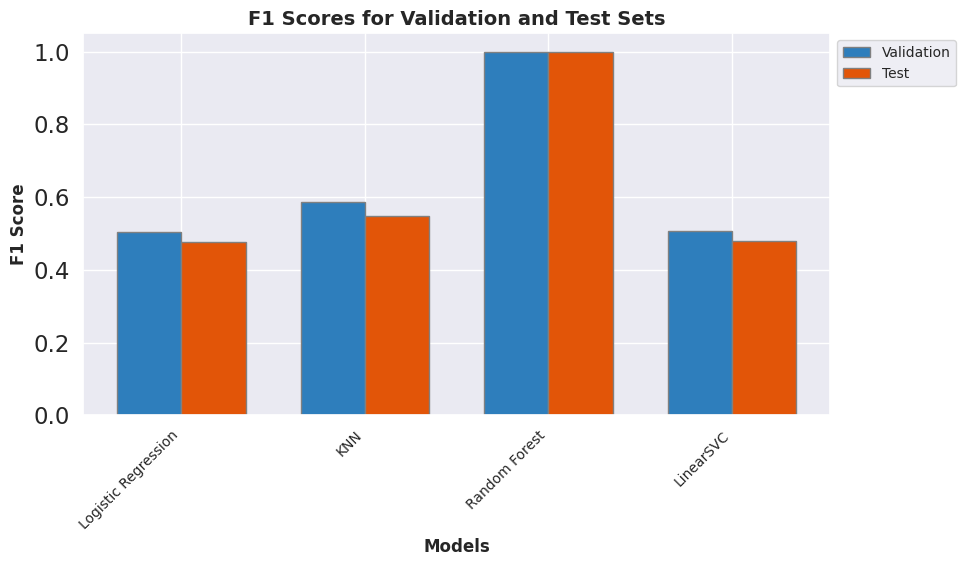

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# model scores
model_scores = {
    'Logistic Regression': {'Validation F1 Score': 0.5047102483585498, 'Test F1 Score': 0.4776470588235294},
    'KNN': {'Validation F1 Score': 0.58603066439523, 'Test F1 Score': 0.5491606714628297},
    'Random Forest': {'Validation F1 Score': 1.0, 'Test F1 Score': 1.0},
    'LinearSVC': {'Validation F1 Score': 0.5063437139561707, 'Test F1 Score': 0.4803337306317044}
}

# Extract F1 scores from the model results
model_names = list(model_scores.keys())
val_f1_scores = [result['Validation F1 Score'] for result in model_scores.values()]
test_f1_scores = [result['Test F1 Score'] for result in model_scores.values()]

# Bar width
bar_width = 0.35

# Set positions of bar on X axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

# Increase figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Bar colors
val_color = plt.cm.Blues(0.7)
test_color = plt.cm.Oranges(0.7)

# Plot bars
ax.bar(r1, val_f1_scores, color=val_color, width=bar_width, edgecolor='grey', label='Validation')
ax.bar(r2, test_f1_scores, color=test_color, width=bar_width, edgecolor='grey', label='Test')

# Add labels and title
ax.set_xlabel('Models', fontweight='bold', fontsize=12)
ax.set_xticks([r + bar_width/2 for r in range(len(model_names))])
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('F1 Score', fontweight='bold', fontsize=12)
ax.set_title('F1 Scores for Validation and Test Sets', fontweight='bold', fontsize=14)

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


# Best performance model

In [64]:
RF_CLS =  RandomForestClassifier(class_weight='balanced', random_state=42)
RF_CLS.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [65]:
import pickle
pickle.dump(RF_CLS, open("/content/drive/MyDrive/Bank Term Deposit Predictions/deposit.prediction_model.sav","wb"))

In [68]:
loaded_model = pickle.load(open("/content/drive/MyDrive/Bank Term Deposit Predictions/deposit.prediction_model.sav","rb"))

## Test model with User input

In [69]:
# testing model
input_data = (46,1,1,2,0,668,1,0,2,15,8,1263,2,-1,0,3)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# load the saved model
loaded_model = pickle.load(open('/content/drive/MyDrive/Bank Term Deposit Predictions/deposit.prediction_model.sav', 'rb'))

# make predictions
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

# check the prediction
if(prediction[0] ==0):
    print('won’t  subscription ')
else:
    print('will subscribe deposit terms ')

[1]
will subscribe deposit terms 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Feature Importance


In [71]:
RF_CLS.feature_importances_

array([0.08038333, 0.03635699, 0.0172051 , 0.02092404, 0.00131265,
       0.08507166, 0.03412387, 0.01002154, 0.04765347, 0.07087314,
       0.08284479, 0.37961284, 0.0325288 , 0.04526252, 0.02239791,
       0.03342735])

In [74]:
feature_dict = dict(zip(train_df_encoded.columns, list(RF_CLS.feature_importances_)))
feature_dict

{'age': 0.08038333240647409,
 'job': 0.03635699111070615,
 'marital': 0.017205103807566586,
 'education': 0.02092404020130834,
 'default': 0.001312651932677492,
 'balance': 0.085071660723187,
 'housing': 0.034123871097965275,
 'loan': 0.010021538635489899,
 'contact': 0.0476534669821707,
 'day': 0.07087313931289328,
 'month': 0.08284478749370644,
 'duration': 0.3796128393459798,
 'campaign': 0.032528798584709966,
 'pdays': 0.045262519650369884,
 'previous': 0.022397909169229322,
 'poutcome': 0.03342734954556581}

<Axes: title={'center': 'Feature Important'}>

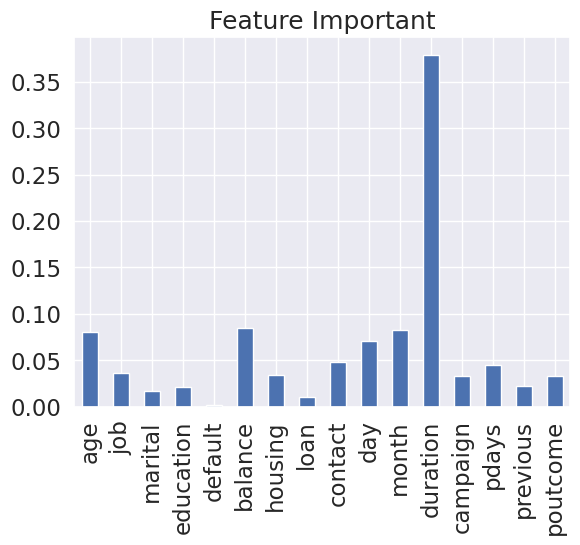

In [75]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Important",
                      legend=False)